<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [3]:
#train = pd.read_csv('drive/My Drive/Projects/Twitter Sentiment/train_tweet.csv')
#test = pd.read_csv('drive/My Drive/Projects/Twitter Sentiment/test_tweets.csv')
train=pd.read_csv(r"C:\Users\trinu\Downloads\Twitter- code\Twitter- code\Twitter analysis\train_tweet.csv")
test=pd.read_csv(r"C:\Users\trinu\Downloads\Twitter- code\Twitter- code\Twitter analysis\test_tweets.csv")

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [4]:
train.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [5]:
test.head()

id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...

In [6]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [7]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(20)

id  label                                              tweet
0    1      0   @user when a father is dysfunctional and is s...
1    2      0  @user @user thanks for #lyft credit i can't us...
2    3      0                                bihday your majesty
3    4      0  #model   i love u take with u all the time in ...
4    5      0             factsguide: society now    #motivation
5    6      0  [2/2] huge fan fare and big talking before the...
6    7      0   @user camping tomorrow @user @user @user @use...
7    8      0  the next school year is the year for exams.ð...
8    9      0  we won!!! love the land!!! #allin #cavs #champ...
9   10      0   @user @user welcome here !  i'm   it's so #gr...
10  11      0   â #ireland consumer price index (mom) climb...
11  12      0  we are so selfish. #orlando #standwithorlando ...
12  13      0  i get to see my daddy today!!   #80days #getti...
15  16      0  ouch...junior is angryð#got7 #junior #yugyo...
16  17      0  i am thankful for having a paner. #thankful #p...
18  19      0  its #friday! ð smiles all around via ig use...
19  20      0  as we all know, essential oils are not made of...
20  21      0  #euro2016 people blaming ha for conceded goal ...
21  22      0  sad little dude..   #badday #coneofshame #cats...
22  23      0  product of the day: happy man #wine tool  who'...

In [8]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(20)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...
114  115      1  @user why not @user mocked obama for being bla...
131  132      1  #people aren't protesting #trump because a #re...
151  152      1  yes it's  when you call #michelleobama a goril...
156  157      1  as the smaller hands show, barry probably lied...
167  168      1  @user @user you point one finger @user million...
192  193      1  you might be a libtard if... #libtard  #sjw #l...
210  211      1  @user take out the #trash america...  - i vote...
232  233      1  if you hold open a door for a woman because sh...
263  264      1  @user this man ran for governor of ny, the sta...
264  265      1  #stereotyping #prejudice  offer no #hope or so...

label
0    29720
1     2242
Name: count, dtype: int64


<Axes: xlabel='label'>

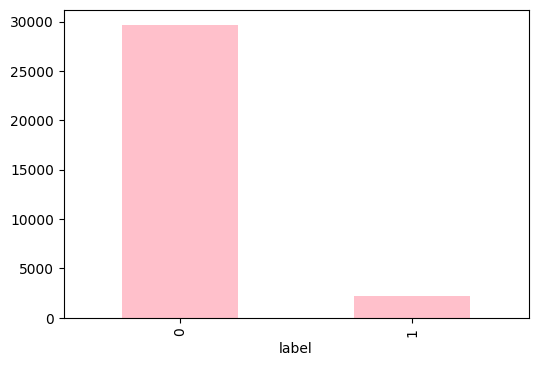

In [9]:
train_label_counts = train['label'].value_counts()
print(train_label_counts)


train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

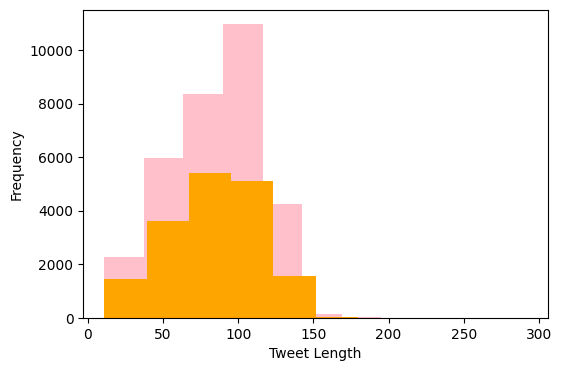

In [10]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4)).set(xlabel='Tweet Length', ylabel='Frequency')
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4)).set(xlabel='Tweet Length', ylabel='Frequency')

In [11]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

id  label                                              tweet  len
0   1      0   @user when a father is dysfunctional and is s...  102
1   2      0  @user @user thanks for #lyft credit i can't us...  122
2   3      0                                bihday your majesty   21
3   4      0  #model   i love u take with u all the time in ...   86
4   5      0             factsguide: society now    #motivation   39
5   6      0  [2/2] huge fan fare and big talking before the...  116
6   7      0   @user camping tomorrow @user @user @user @use...   74
7   8      0  the next school year is the year for exams.ð...  143
8   9      0  we won!!! love the land!!! #allin #cavs #champ...   87
9  10      0   @user @user welcome here !  i'm   it's so #gr...   50

In [12]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

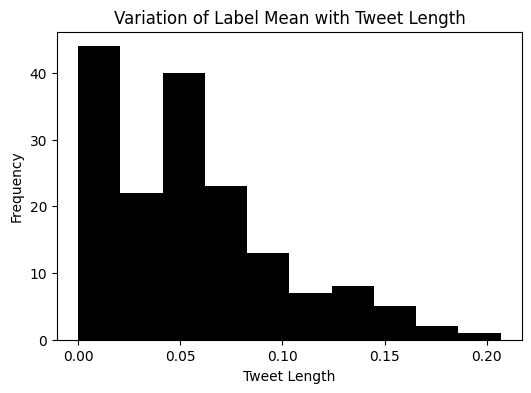

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'label' column contains numeric data
train['label'] = pd.to_numeric(train['label'], errors='coerce')

# Group the training data by the length of tweets
grouped_data = train.groupby(train['tweet'].str.len())

# Calculate the mean of labels for each length
grouped_mean = grouped_data['label'].mean()

# Plot a histogram of the mean labels, with black color and a specific figure size
grouped_mean.plot.hist(color='black', figsize=(6, 4))

# Set the title of the plot
plt.title('Variation of Label Mean with Tweet Length')

# Set the label for the x-axis
plt.xlabel('Tweet Length')

# Display the plot
plt.show()


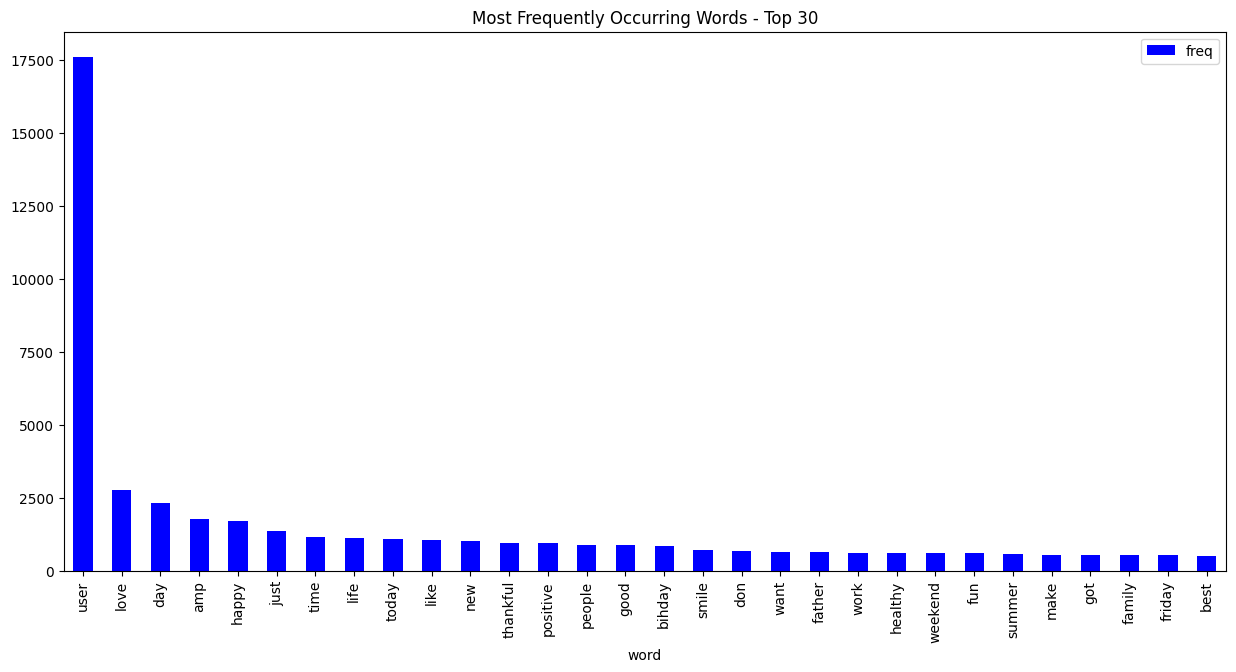

In [14]:
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer from scikit-learn

# Initializing CountVectorizer with English stop words
cv = CountVectorizer(stop_words='english')

# Transforming the 'tweet' column of the training data into a matrix of token counts
words = cv.fit_transform(train.tweet)

# Summing up the counts of each word across all tweets
sum_words = words.sum(axis=0)

# Creating a list of tuples containing word and its frequency
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

# Sorting the list of word frequencies in descending order
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Converting the sorted list of word frequencies into a DataFrame
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plotting the top 30 most frequently occurring words in a bar plot
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')

# Setting the title for the plot
plt.title("Most Frequently Occurring Words - Top 30")

# Displaying the plot
plt.show()


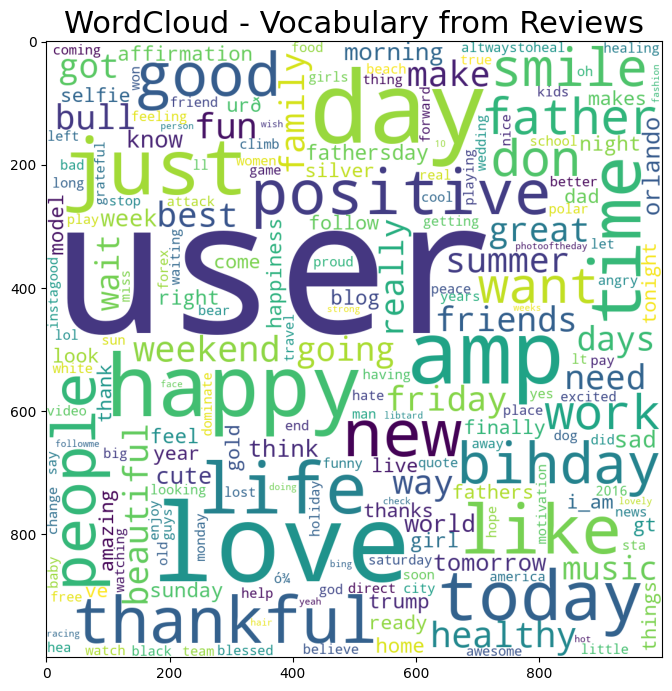

In [15]:
# Importing necessary library
from wordcloud import WordCloud

# Generating WordCloud from the word frequencies
wordcloud = WordCloud(background_color='white', width=1000, height=1000).generate_from_frequencies(dict(words_freq))

# Creating a new figure for the plot
plt.figure(figsize=(10, 8))

# Displaying the WordCloud
plt.imshow(wordcloud)

# Adding a title to the WordCloud plot
plt.title("WordCloud - Vocabulary from Reviews", fontsize=22)

# Displaying the plot
plt.show()

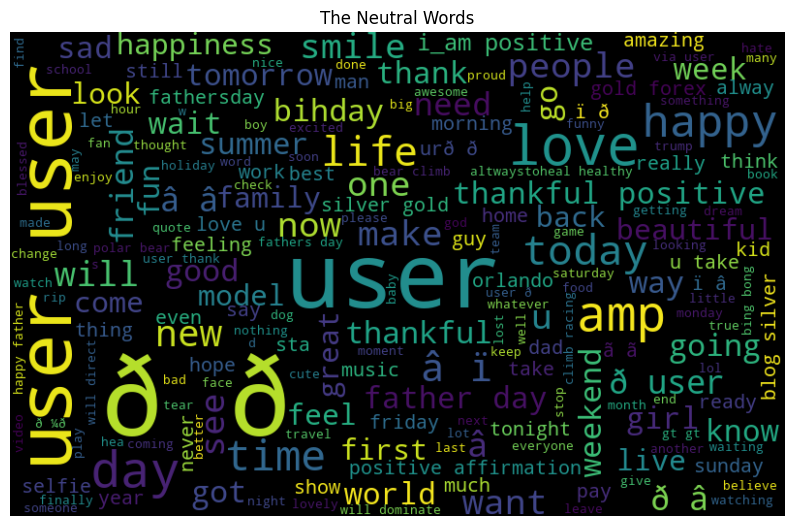

In [16]:
# Joining all tweets labeled as neutral (label == 0) into a single string
normal_words = ' '.join([text for text in train['tweet'][train['label'] == 0]])

# Generating WordCloud from the combined text of neutral tweets
wordcloud = WordCloud(width=800, height=500, random_state=0, max_font_size=110).generate(normal_words)

# Creating a new figure for the plot
plt.figure(figsize=(10, 7))

# Displaying the WordCloud with bilinear interpolation for smoother rendering
plt.imshow(wordcloud, interpolation="bilinear")

# Turning off the axes
plt.axis('off')

# Adding a title to the WordCloud plot
plt.title('The Neutral Words')

# Displaying the plot
plt.show()

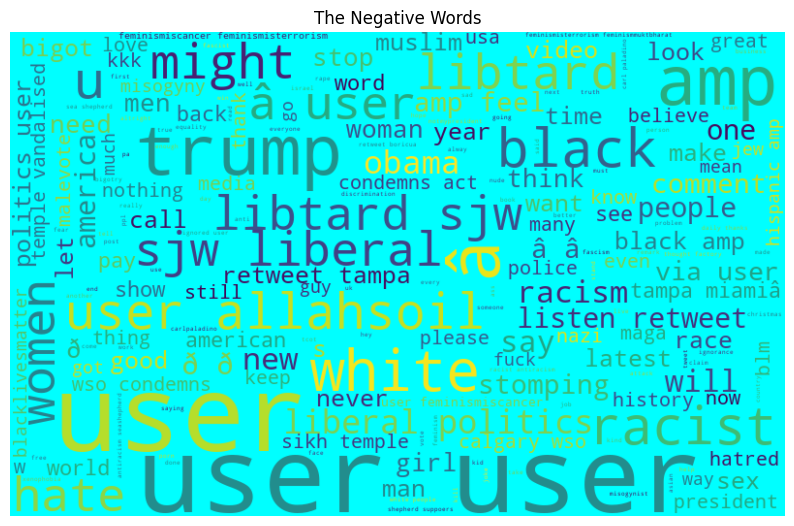

In [17]:
# Joining all tweets labeled as negative (label == 1) into a single string
negative_words = ' '.join([text for text in train['tweet'][train['label'] == 1]])

# Generating WordCloud from the combined text of negative tweets
wordcloud = WordCloud(background_color='cyan', width=800, height=500, random_state=0, max_font_size=110).generate(negative_words)

# Creating a new figure for the plot
plt.figure(figsize=(10, 7))

# Displaying the WordCloud with bilinear interpolation for smoother rendering
plt.imshow(wordcloud, interpolation="bilinear")

# Turning off the axes
plt.axis('off')

# Adding a title to the WordCloud plot
plt.title('The Negative Words')

# Displaying the plot
plt.show()


In [18]:
# Import the re module for regular expressions
import re

#collecting the hasttags
# Define the hashtag_extract function
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# Apply the hashtag_extract function to extract hashtags
hashtags = hashtag_extract(train['tweet'])

# Display the output (optional)
hashtags[:10]  # Displaying the first 10 extracted hashtags as an example


[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8']]

In [19]:
# Importing the re module for regular expressions
import re

# Define the hashtag_extract function
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Extracting hashtags from non-racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# Extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# Unnesting the list of hashtags
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

# Printing the first 10 extracted hashtags from non-racist/sexist tweets
print("Hashtags from non-racist/sexist tweets:")
print(HT_regular[:10])

# Printing the first 10 extracted hashtags from racist/sexist tweets
print("\nHashtags from racist/sexist tweets:")
print(HT_negative[:10])


Hashtags from non-racist/sexist tweets:
['run', 'lyft', 'disapointed', 'getthanked', 'model', 'motivation', 'allshowandnogo', 'school', 'exams', 'hate']

Hashtags from racist/sexist tweets:
['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins', 'neverump']


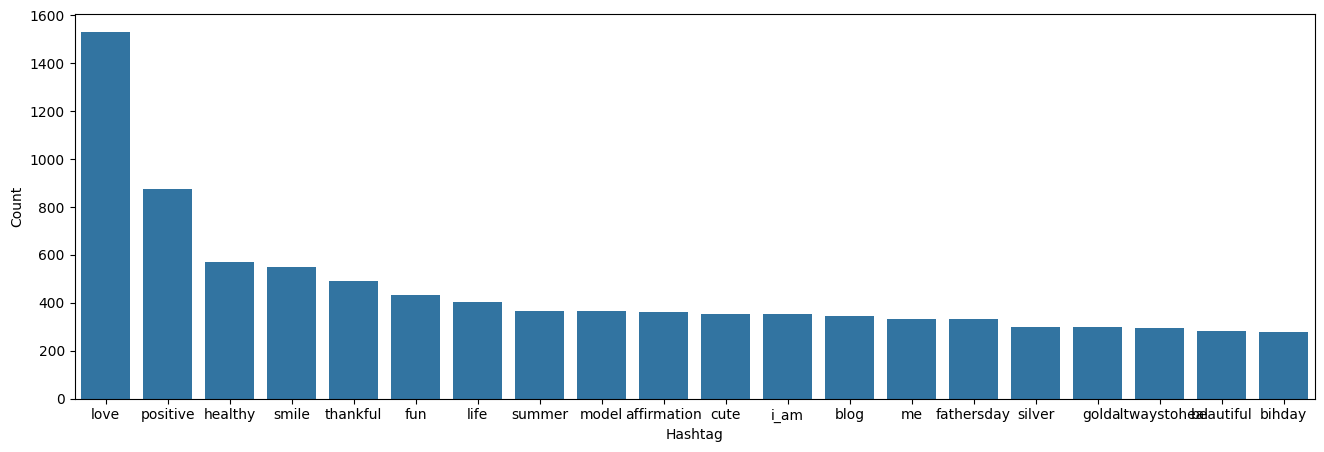

In [20]:
import nltk
# Create a frequency distribution of hashtags from non-racist/sexist tweets
a = nltk.FreqDist(HT_regular)

# Create a DataFrame to store the hashtag frequencies
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Plotting the top 20 most frequent hashtags
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

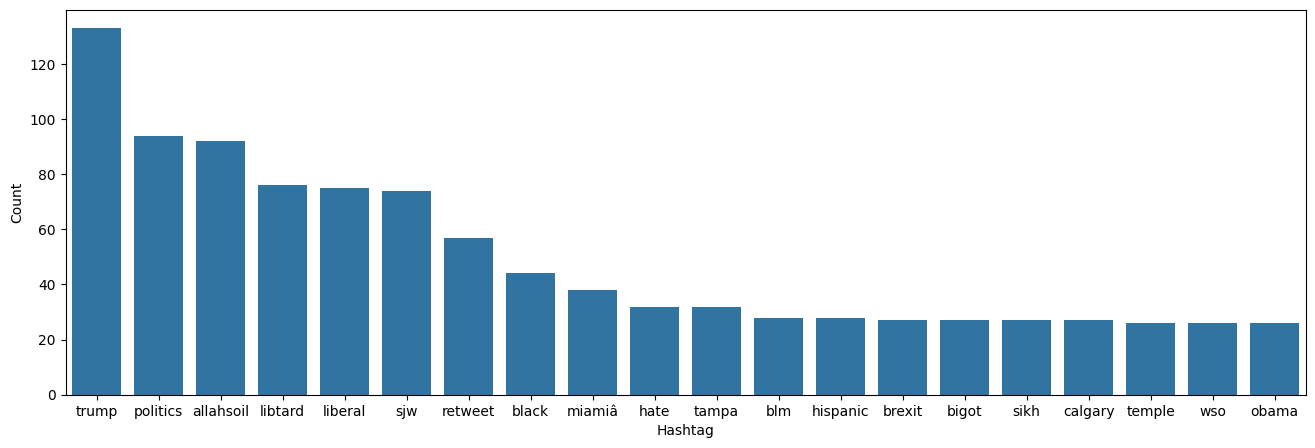

In [21]:
# Create a frequency distribution of hashtags from racist/sexist tweets
a = nltk.FreqDist(HT_negative)

# Create a DataFrame to store the hashtag frequencies
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select the top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Plotting the top 20 most frequent hashtags
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel='Count')
plt.show()

In [22]:
# Importing necessary libraries
import gensim
import pandas as pd

# Tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# Creating a Word2Vec model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,        # Desired number of features/independent variables 
            window=5,        # Context window size
            min_count=2,     # Ignores all words with a total frequency lower than this
            sg=1,            # 1 for skip-gram model
            hs=0,
            negative=10,     # For negative sampling
            workers=2,       # Number of cores
            seed=34)

# Training the Word2Vec model
model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)


ModuleNotFoundError: No module named 'gensim'

In [ ]:
# Then import necessary libraries
import gensim

# Load your Word2Vec model
# Assuming you've already trained your model and stored it in model_w2v

# Now you can find words most similar to "dinner"
similar_words = model_w2v.wv.most_similar(positive="dinner")

# Print the most similar words
print(similar_words)

In [ ]:
model_w2v.wv.most_similar(positive = "cancer")

In [ ]:
model_w2v.wv.most_similar(positive = "apple")

In [ ]:
model_w2v.wv.most_similar(negative = "hate")

In [ ]:
# Install necessary packages
# !pip install tqdm gensim

# Import the tqdm library for progress bars
from tqdm import tqdm

# Set up tqdm to display progress bars
tqdm.pandas(desc="progress-bar")

# Import LabeledSentence from gensim.models.doc2vec
from gensim.models.doc2vec import LabeledSentence


In [ ]:

# Import necessary libraries
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence

# Define a function to add labels to tokenized tweets
def add_label(twt):
    output = []
    # Iterate over each tweet and assign a label
    for i, s in zip(twt.index, twt):
        # Append the tokenized tweet with its label to the output list
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# Label all the tokenized tweets
labeled_tweets = add_label(tokenized_tweet)

# Display the first 6 labeled tweets
labeled_tweets[:6]


In [23]:
# Import necessary libraries
import re
import nltk

# Download NLTK's stopwords
nltk.download('stopwords')

# Import stopwords and PorterStemmer from NLTK
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trinu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Initialize an empty list to store processed tweets
train_corpus = []

# Loop through each tweet in the 'tweet' column of the 'train' DataFrame
for i in range(0, 31962):
    # Remove non-alphabetic characters using regular expressions
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
    # Convert text to lowercase
    review = review.lower()
    # Tokenize the text into words
    review = review.split()
  
    # Initialize a Porter Stemmer object
    ps = PorterStemmer()
  
    # Perform stemming and remove stopwords
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
    # Join the processed words back into sentences
    review = ' '.join(review)
  
    # Append the processed tweet to the train_corpus list
    train_corpus.append(review)
    print(train_corpus[:5])


['user father dysfunct selfish drag kid dysfunct run']
['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank']
['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti']
['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur']
['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur', 'factsguid societi motiv']
['user father dysfunct selfish drag kid dysfunct run', 'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank', 'bihday majesti', 'model love u take u time ur', 'factsguid societi motiv']
['user father dysfunct selfish 

In [25]:
# Initialize an empty list to store processed tweets
test_corpus = []

# Loop through each tweet in the 'tweet' column of the 'test' DataFrame
for i in range(0, 17197):
    # Remove non-alphabetic characters using regular expressions
    review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
    # Convert text to lowercase
    review = review.lower()
    # Tokenize the text into words
    review = review.split()
  
    # Initialize a Porter Stemmer object
    ps = PorterStemmer()
  
    # Perform stemming and remove stopwords
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
    # Join the processed words back into sentences
    review = ' '.join(review)
  
    # Append the processed tweet to the test_corpus list
    test_corpus.append(review)


In [26]:
# Import CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with a maximum of 2500 features
cv = CountVectorizer(max_features=2500)

# Convert the preprocessed tweets in train_corpus to a bag of words representation
# x will contain the bag of words matrix
x = cv.fit_transform(train_corpus).toarray()

# Extract the labels (target variable) from the 'label' column of the 'train' DataFrame
y = train.iloc[:, 1]

# Print the shape of the bag of words matrix (x) and the shape of the target variable (y)
print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [27]:
# Import CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with a maximum of 2500 features
cv = CountVectorizer(max_features=2500)

# Convert the preprocessed tweets in test_corpus to a bag of words representation
# x_test will contain the bag of words matrix for the test data
x_test = cv.fit_transform(test_corpus).toarray()

# Print the shape of the bag of words matrix for the test data (x_test)
print(x_test.shape)


(17197, 2500)


In [28]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Split the training data (x and y) into training and validation sets
# The test_size parameter specifies the proportion of the data to include in the validation set
# The random_state parameter ensures reproducibility of the split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

# Print the shapes of the training and validation sets
print("Training set shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nValidation set shapes:")
print("x_valid:", x_valid.shape)
print("y_valid:", y_valid.shape)


Training set shapes:
x_train: (23971, 2500)
y_train: (23971,)

Validation set shapes:
x_valid: (7991, 2500)
y_valid: (7991,)


In [29]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
sc = StandardScaler()

# Standardize the features in the training set
x_train = sc.fit_transform(x_train)

# Standardize the features in the validation set
x_valid = sc.transform(x_valid)

# Standardize the features in the test set
x_test = sc.transform(x_test)

print("Mean of standardized training set:", x_train.mean(axis=0))
print("Standard deviation of standardized training set:", x_train.std(axis=0))



Mean of standardized training set: [ 3.65341984e-16  2.08271084e-15 -9.27063552e-17 ... -7.90234098e-16
 -4.93441879e-16 -3.30320413e-17]
Standard deviation of standardized training set: [1. 1. 1. ... 1. 1. 1.]


In [30]:
# Import RandomForestClassifier, confusion_matrix, and f1_score from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Initialize a Random Forest classifier
model = RandomForestClassifier()

# Train the Random Forest classifier on the training data
model.fit(x_train, y_train)

# Predict the labels for the validation set
y_pred = model.predict(x_valid)

# Print the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 Score:", f1)

# Calculate and print the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9991656585040257
Validation Accuracy: 0.9528219246652484
F1 Score: 0.6164801627670397
Confusion Matrix:
[[7311  121]
 [ 256  303]]


In [31]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression classifier
model = LogisticRegression()

# Train the Logistic Regression classifier on the training data
model.fit(x_train, y_train)

# Predict the labels for the validation set
y_pred = model.predict(x_valid)

# Print the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 Score:", f1)

# Calculate and print the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9848984189228651
Validation Accuracy: 0.943186084344888
F1 Score: 0.598939929328622
Confusion Matrix:
[[7198  234]
 [ 220  339]]


In [32]:
# Import DecisionTreeClassifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
model.fit(x_train, y_train)

# Predict the labels for the validation set
y_pred = model.predict(x_valid)

# Print the training and validation accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Validation Accuracy:", model.score(x_valid, y_valid))

# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)
print("F1 Score:", f1)

# Calculate and print the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9991656585040257
Validation Accuracy: 0.9312977099236641
F1 Score: 0.5311699402220325
Confusion Matrix:
[[7131  301]
 [ 248  311]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix

# Importing SVC from scikit-learn
model = SVC()

# Training the SVM classifier on the training data
model.fit(x_train, y_train)

# Predicting the labels for the validation set
y_pred = model.predict(x_valid)

# Calculating the training accuracy
train_accuracy = model.score(x_train, y_train)

# Calculating the validation accuracy
valid_accuracy = model.score(x_valid, y_valid)

# Calculating the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)

# Calculating the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)

# Printing the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)


In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

# Import XGBClassifier from XGBoost
model = XGBClassifier()

# Train the XGBoost classifier on the training data
model.fit(x_train, y_train)

# Predict the labels for the validation set
y_pred = model.predict(x_valid)

# Calculate the training accuracy
train_accuracy = model.score(x_train, y_train)

# Calculate the validation accuracy
valid_accuracy = model.score(x_valid, y_valid)

# Calculate the F1 score for the validation set
f1 = f1_score(y_valid, y_pred)

# Calculate and print the confusion matrix for the validation set
cm = confusion_matrix(y_valid, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)


Training Accuracy: 0.9608693838388053
Validation Accuracy: 0.9550744587661119
F1 Score: 0.5751479289940828
Confusion Matrix:
[[7389   43]
 [ 316  243]]
